### Analysis and Prediction of Indian Liver disease Patients

- The following Jupyter notebook contains
    - Data cleaning
    - EDA
    - Data visualization
    - Linear Regression
    - Prediction

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

1.1 Loading the dataset

In [155]:
livr = pd.read_csv('indian_liver_patient.csv')

In [156]:
livr.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [157]:
livr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


- Dataset is our target variable. 1 represents 'Liver disease' and 2 represents 'normal'
- Albumin_and_Globulin_Ratio has some NULL values

1.2. Observing Null Values

In [158]:
livr.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [159]:
livr[livr.Albumin_and_Globulin_Ratio.isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


Since only 4 values are missing, dropping 4 rows.

In [160]:
livr = livr.dropna(subset=['Albumin_and_Globulin_Ratio'])

In [161]:
livr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    object 
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


- Renaming column 'dataset' to disease for better interpretation
- Converting disease value to 1 and normal to 0

In [162]:
# renaming Dataset column
livr.rename(columns={'Dataset':'Disease'},inplace=True)

In [163]:
# mapping 1,2 in Disease column to 1,0
livr['Disease'] = livr.Disease.map({1:1,2:0})

In [164]:
livr.Disease.value_counts()

1    414
0    165
Name: Disease, dtype: int64

In [165]:
livr.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
count,579.000000,579,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.782383,NaN,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,0.715026
std,16.221786,NaN,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000


We see that in some columns there can be outliers

#### 2. Data visualization

<AxesSubplot:xlabel='Gender', ylabel='Disease'>

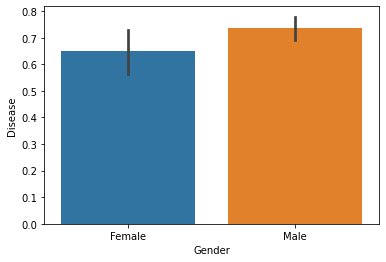

In [166]:
# plotting gender vs disease
sns.barplot(x='Gender',y='Disease',data=livr)

On an average more number of males had liver disease

Average age of each gender for Liver diease

In [167]:
livr[['Disease','Gender','Age']].groupby(['Disease','Gender']).mean().sort_values('Disease')

Age
Disease Gender           
0       Female  42.897959
        Male    40.715517
1       Female  43.329670
        Male    46.938080

The average age of males having liver disease is significantly more than normal patients.

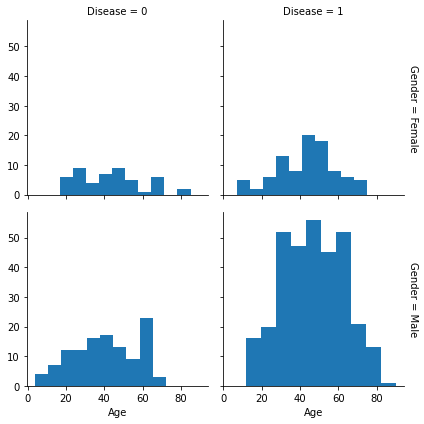

In [168]:
fig = sns.FacetGrid(livr, col="Disease", row="Gender",margin_titles=True)

fig.map(plt.hist,'Age')

Most number of liver disease patients are middle aged males.

<AxesSubplot:xlabel='Age', ylabel='Count'>

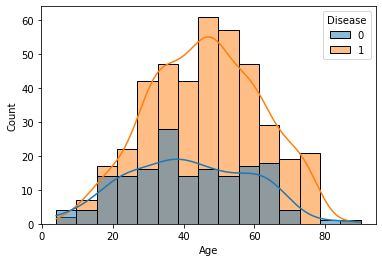

In [169]:
sns.histplot(x='Age',hue='Disease',data=livr,kde=True)

Plotting relation between Direct bilurubin and Total Bilurubin

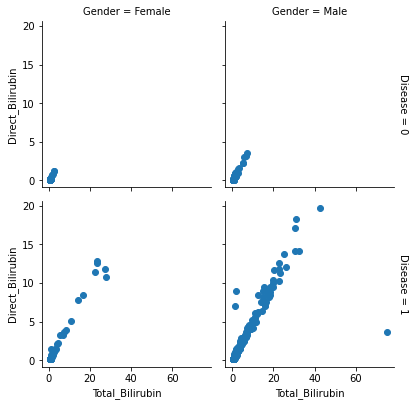

In [170]:
fig = sns.FacetGrid(livr,row='Disease',col='Gender',margin_titles=True)
fig.map(plt.scatter,'Total_Bilirubin','Direct_Bilirubin')
plt.subplots_adjust(top=0.9)

Total Bilirubin and Direct Bilirubin are collinear.

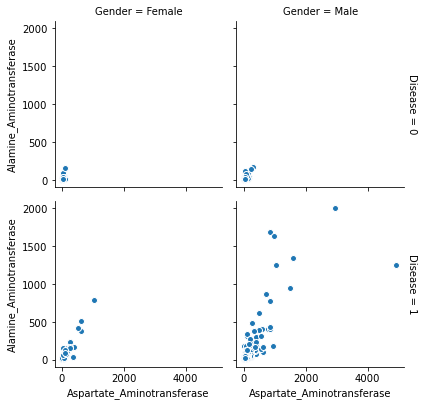

In [171]:
fig = sns.FacetGrid(livr, col="Gender", row="Disease", margin_titles=True)
fig.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

Aspartate_Aminotransferase and Alamine_Aminotransferase show linear relationship

Removing outliers for better visualisaiton

In [172]:
num_cols = ['Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']

In [173]:
# Making outliers null

for x in ['Total_Bilirubin']:
    q75,q25 = np.percentile(livr_eda.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    livr_eda.loc[livr_eda[x] < min,x] = np.nan
    livr_eda.loc[livr_eda[x] > max,x] = np.nan


for x in ['Direct_Bilirubin']:
    q75,q25 = np.percentile(livr_eda.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    livr_eda.loc[livr_eda[x] < min,x] = np.nan
    livr_eda.loc[livr_eda[x] > max,x] = np.nan


for x in ['Alkaline_Phosphotase']:
    q75,q25 = np.percentile(livr_eda.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    livr_eda.loc[livr_eda[x] < min,x] = np.nan
    livr_eda.loc[livr_eda[x] > max,x] = np.nan

    
for x in ['Alamine_Aminotransferase']:
    q75,q25 = np.percentile(livr_eda.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    livr_eda.loc[livr_eda[x] < min,x] = np.nan
    livr_eda.loc[livr_eda[x] > max,x] = np.nan
    
for x in ['Aspartate_Aminotransferase']:
    q75,q25 = np.percentile(livr_eda.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    livr_eda.loc[livr_eda[x] < min,x] = np.nan
    livr_eda.loc[livr_eda[x] > max,x] = np.nan
    
for x in ['Total_Protiens']:
    q75,q25 = np.percentile(livr_eda.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    livr_eda.loc[livr_eda[x] < min,x] = np.nan
    livr_eda.loc[livr_eda[x] > max,x] = np.nan
    
for x in ['Albumin']:
    q75,q25 = np.percentile(livr_eda.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    livr_eda.loc[livr_eda[x] < min,x] = np.nan
    livr_eda.loc[livr_eda[x] > max,x] = np.nan
    
for x in ['Albumin_and_Globulin_Ratio']:
    q75,q25 = np.percentile(livr_eda.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    livr_eda.loc[livr_eda[x] < min,x] = np.nan
    livr_eda.loc[livr_eda[x] > max,x] = np.nan


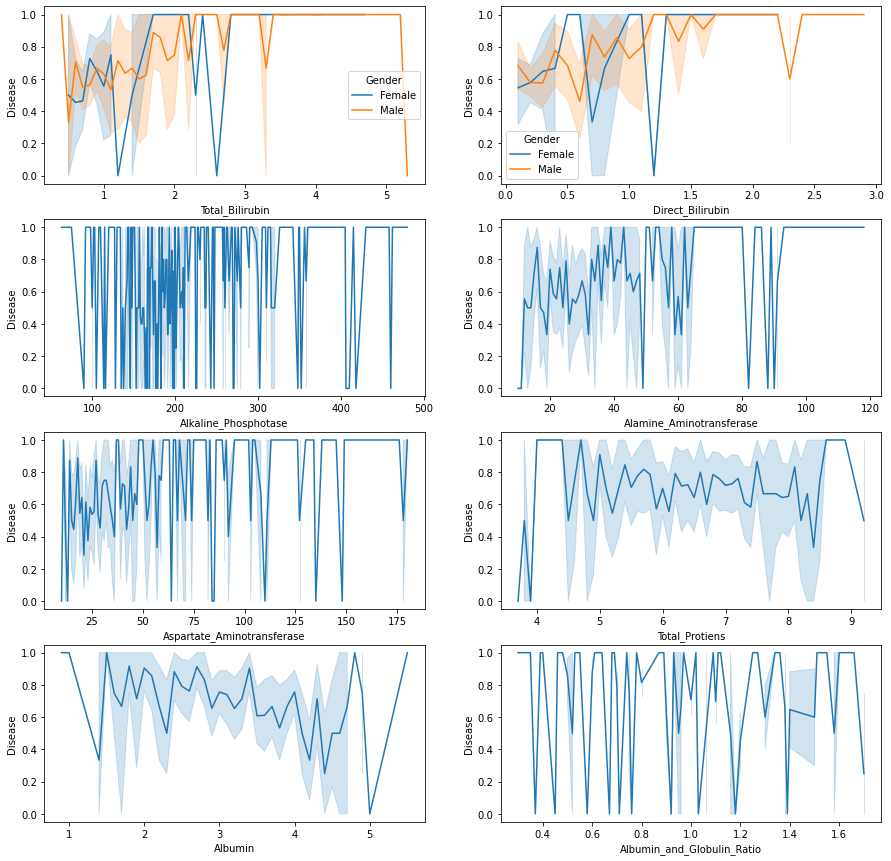

In [174]:
fig,ax = plt.subplots(4,2,figsize=(15,15))

sns.lineplot(data=livr_eda,x='Total_Bilirubin',y='Disease',hue='Gender',ax=ax[0,0])
sns.lineplot(data=livr_eda,x='Direct_Bilirubin',y='Disease',hue='Gender',ax=ax[0,1])
sns.lineplot(data=livr_eda,x='Alkaline_Phosphotase',y='Disease',ax=ax[1,0])
sns.lineplot(data=livr_eda,x='Alamine_Aminotransferase',y='Disease',ax=ax[1,1])
sns.lineplot(data=livr_eda,x='Aspartate_Aminotransferase',y='Disease',ax=ax[2,0])
sns.lineplot(data=livr_eda,x='Total_Protiens',y='Disease',ax=ax[2,1])
sns.lineplot(data=livr_eda,x='Albumin',y='Disease',ax=ax[3,0])
sns.lineplot(data=livr_eda,x='Albumin_and_Globulin_Ratio',y='Disease',ax=ax[3,1])

plt.show()

High levels of direct & toal bilirubin is related to liver disease cases. The trend is more prominent in males.

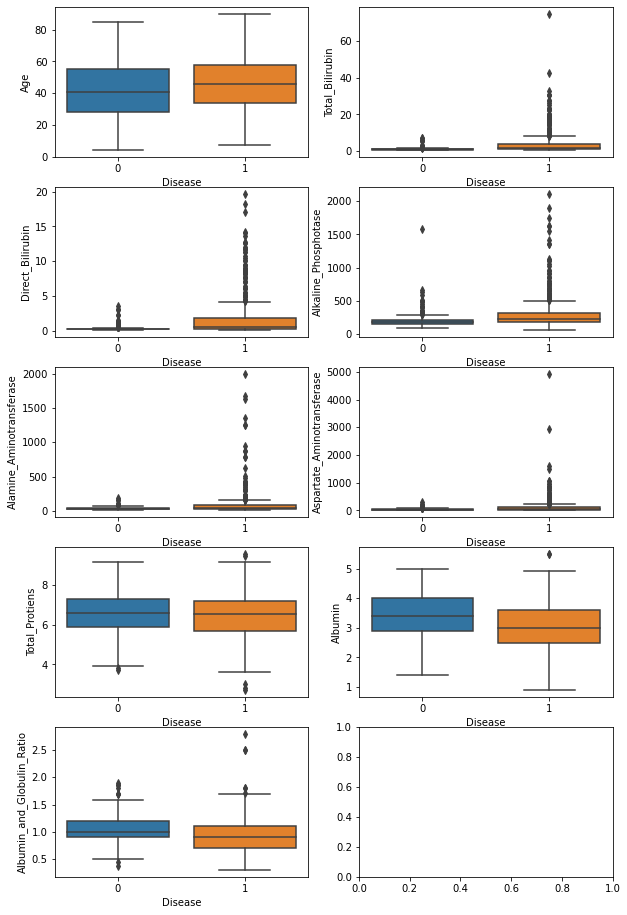

In [175]:
# Box plots of variables

fig,ax = plt.subplots(5,2,figsize=(10,16))

sns.boxplot(x='Disease',y='Age',data=livr,ax=ax[0,0])
sns.boxplot(x='Disease',y='Total_Bilirubin',data=livr,ax=ax[0,1])
sns.boxplot(x='Disease',y='Direct_Bilirubin',data=livr,ax=ax[1,0])
sns.boxplot(x='Disease',y='Alkaline_Phosphotase',data=livr,ax=ax[1,1])
sns.boxplot(x='Disease',y='Alamine_Aminotransferase',data=livr,ax=ax[2,0])
sns.boxplot(x='Disease',y='Aspartate_Aminotransferase',data=livr,ax=ax[2,1])
sns.boxplot(x='Disease',y='Total_Protiens',data=livr,ax=ax[3,0])
sns.boxplot(x='Disease',y='Albumin',data=livr,ax=ax[3,1])
sns.boxplot(x='Disease',y='Albumin_and_Globulin_Ratio',data=livr,ax=ax[4,0])

plt.show()

- Mean Total Bilirubin levels are **high** in liver disease patients
- Mean Alkaline Phosphotase levels are **high** in liver disease patients
- Mean Alamine Aminotransferase levels are **high** in liver disease patients
- Mean Aspartate_Aminotransferase levels are **high** in liver disease patients
- Mean Albumin levels are **low** in liver disease patients
- Mean Albumin Globulin Ratio levels are **low** in liver disease patients

In [176]:
livr_eda.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,NaN,NaN,NaN,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,NaN,NaN,NaN,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


2.2 Visualizing correlation 

<AxesSubplot:>

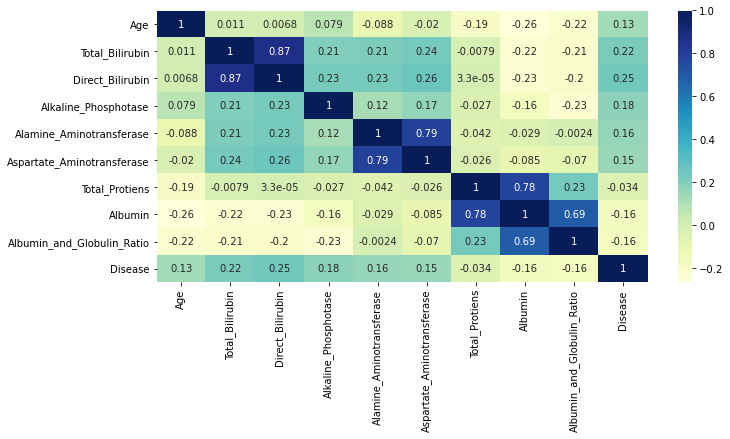

In [177]:
plt.figure(figsize=(11,5))
sns.heatmap(livr.corr(),annot=True,cmap='YlGnBu')

### 3: Data transformation
- Encoding:
    - Converting binary vars to 1 & 0
    - Converting other categ vars to dummy variables
- Splitting of Dataset
- Scaling of variables

3.1. Encoding

In [182]:
livr['Gender'] = livr.Gender.map({'Male':1,'Female':0})

2.2. Splitting Data

In [184]:
import sklearn
from sklearn.model_selection import train_test_split

In [202]:
df_train,df_test = train_test_split(livr, train_size=0.7,test_size=0.3, random_state=100)

print(df_train.shape)
print(df_test.shape)

(405, 11)
(174, 11)


2.3. Scaling

In [203]:
num_col = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']

In [204]:
from sklearn.preprocessing import MinMaxScaler

In [205]:
# using MinMaxScaler method of scaling
scaler = MinMaxScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])

### 3. Building model
        - Splitting train dataset into X and y
        - Adding constant
        - model fitting
        - model summary

3.1. Splitting into X and y

In [209]:
y_train = df_train.pop('Disease')
X_train = df_train

3.2. Adding constant to X_train 

In [210]:
import statsmodels.api as sm

In [211]:
X_train_sm = sm.add_constant(X_train)

3.3. Fitting the model

In [216]:
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()

lr_model.params

const                         0.445078
Age                           0.292926
Gender                        0.048200
Total_Bilirubin              -0.570357
Direct_Bilirubin              0.862156
Alkaline_Phosphotase          0.358308
Alamine_Aminotransferase      0.938417
Aspartate_Aminotransferase   -0.781939
Total_Protiens                0.619122
Albumin                      -0.796698
Albumin_and_Globulin_Ratio    0.131456
dtype: float64

In [217]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Disease   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     6.341
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           4.75e-09
Time:                        13:19:25   Log-Likelihood:                -219.72
No. Observations:                 405   AIC:                             461.4
Df Residuals:                     394   BIC:                             505.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4451      0.123      3.616      0.000       0.203       0.687
Age                            0.2929      0.116      2.529      0.012       0.065       0.521
Gender                         0.0482      0.050      0.966      0.335      -0.050       0.146
Total_Bilirubin               -0.5704      0.944     -0.604      0.546      -2.427       1.286
Direct_Bilirubin               0.8622      0.858      1.005      0.316      -0.825       2.549
Alkaline_Phosphotase           0.3583      0.177      2.019      0.044       0.009       0.707
Alamine_Aminotransferase       0.9384      0.342      2.747      0.006       0.267       1.610
Aspartate_Aminotransferase    -0.7819      0.611     -1.279      0.202      -1.984       0.420
Total_Protiens                 0.6191      0.283      2.191      0.029       0.064       1.175
Albumin                       -0.7967      0.363     -2.192      0.029      -1.511      -0.082
Albumin_and_Globulin_Ratio     0.1315      0.292      0.451      0.653      -0.442       0.705
==============================================================================
Omnibus:                      151.764   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.244
Skew:                          -0.702   Prob(JB):                     2.74e-12
Kurtosis:                       1.912   Cond. No.                         96.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4. Feature Selection
    - VIF
    - Removing features

4.1. VIF

In [218]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [220]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,Features,VIF
8,Albumin,78.881141
7,Total_Protiens,53.813407
2,Total_Bilirubin,44.754694
3,Direct_Bilirubin,44.363121
9,Albumin_and_Globulin_Ratio,14.790153
0,Age,5.460277
1,Gender,3.856908
5,Alamine_Aminotransferase,3.326350
6,Aspartate_Aminotransferase,3.057098
4,Alkaline_Phosphotase,1.998828


4.2. Removing features

### Model 2

In [224]:
# removing Albumin_and_Globulin_Ratio due to high p-value
X_sm_new = X_train_sm

In [225]:
X_sm_new.drop('Albumin_and_Globulin_Ratio',axis=1,inplace=True)

In [226]:
# fitting the model

lr = sm.OLS(y_train,X_sm_new)
lr_model = lr.fit()

lr_model.params

const                         0.464615
Age                           0.289640
Gender                        0.049312
Total_Bilirubin              -0.609742
Direct_Bilirubin              0.915607
Alkaline_Phosphotase          0.349598
Alamine_Aminotransferase      0.920645
Aspartate_Aminotransferase   -0.756023
Total_Protiens                0.536504
Albumin                      -0.665761
dtype: float64

In [228]:
# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Disease   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     7.037
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           1.87e-09
Time:                        13:31:00   Log-Likelihood:                -219.82
No. Observations:                 405   AIC:                             459.6
Df Residuals:                     395   BIC:                             499.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4646      0.115      4.038      0.000       0.238       0.691
Age                            0.2896      0.115      2.508      0.013       0.063       0.517
Gender                         0.0493      0.050      0.991      0.322      -0.049       0.147
Total_Bilirubin               -0.6097      0.939     -0.649      0.517      -2.456       1.237
Direct_Bilirubin               0.9156      0.849      1.078      0.282      -0.754       2.585
Alkaline_Phosphotase           0.3496      0.176      1.984      0.048       0.003       0.696
Alamine_Aminotransferase       0.9206      0.339      2.716      0.007       0.254       1.587
Aspartate_Aminotransferase    -0.7560      0.608     -1.244      0.214      -1.951       0.439
Total_Protiens                 0.5365      0.215      2.498      0.013       0.114       0.959
Albumin                       -0.6658      0.218     -3.053      0.002      -1.095      -0.237
==============================================================================
Omnibus:                      147.698   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.994
Skew:                          -0.702   Prob(JB):                     3.11e-12
Kurtosis:                       1.919   Cond. No.                         94.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
# VIF analysis
vif = pd.DataFrame()
vif['Features'] = X_sm_new.columns
vif['VIF'] = [variance_inflation_factor(X_sm_new.values,i) for i in range(X_sm_new.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,Features,VIF
3,Total_Bilirubin,36.401964
4,Direct_Bilirubin,36.196855
0,const,30.170541
9,Albumin,3.113904
8,Total_Protiens,2.804252
7,Aspartate_Aminotransferase,2.774889
6,Alamine_Aminotransferase,2.748936
5,Alkaline_Phosphotase,1.116143
1,Age,1.094741
2,Gender,1.028014


### Model 3

In [230]:
# removing Albumin_and_Globulin_Ratio due to high p-value
X_sm_new = X_sm_new

In [231]:
X_sm_new.drop('Total_Bilirubin',axis=1,inplace=True)

In [232]:
# fitting the model

lr = sm.OLS(y_train,X_sm_new)
lr_model = lr.fit()

lr_model.params

const                         0.456543
Age                           0.291814
Gender                        0.051137
Direct_Bilirubin              0.374053
Alkaline_Phosphotase          0.359540
Alamine_Aminotransferase      0.923877
Aspartate_Aminotransferase   -0.778048
Total_Protiens                0.528284
Albumin                      -0.650588
dtype: float64

In [233]:
# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Disease   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     7.875
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           7.65e-10
Time:                        13:33:24   Log-Likelihood:                -220.04
No. Observations:                 405   AIC:                             458.1
Df Residuals:                     396   BIC:                             494.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4565      0.114      3.994      0.000       0.232       0.681
Age                            0.2918      0.115      2.530      0.012       0.065       0.519
Gender                         0.0511      0.050      1.030      0.304      -0.046       0.149
Direct_Bilirubin               0.3741      0.158      2.373      0.018       0.064       0.684
Alkaline_Phosphotase           0.3595      0.175      2.050      0.041       0.015       0.704
Alamine_Aminotransferase       0.9239      0.339      2.728      0.007       0.258       1.590
Aspartate_Aminotransferase    -0.7780      0.607     -1.283      0.200      -1.971       0.414
Total_Protiens                 0.5283      0.214      2.466      0.014       0.107       0.949
Albumin                       -0.6506      0.217     -3.002      0.003      -1.077      -0.225
==============================================================================
Omnibus:                      146.777   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.181
Skew:                          -0.705   Prob(JB):                     2.83e-12
Kurtosis:                       1.920   Cond. No.                         50.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [234]:
# VIF analysis
vif = pd.DataFrame()
vif['Features'] = X_sm_new.columns
vif['VIF'] = [variance_inflation_factor(X_sm_new.values,i) for i in range(X_sm_new.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,Features,VIF
0,const,29.818270
8,Albumin,3.078135
7,Total_Protiens,2.794501
6,Aspartate_Aminotransferase,2.766247
5,Alamine_Aminotransferase,2.748342
3,Direct_Bilirubin,1.248927
4,Alkaline_Phosphotase,1.107709
1,Age,1.093821
2,Gender,1.024736


### Model 4

In [235]:
# removing Albumin_and_Globulin_Ratio due to high p-value
X_sm_new = X_sm_new

In [236]:
X_sm_new.drop('Aspartate_Aminotransferase',axis=1,inplace=True)

In [237]:
# fitting the model

lr = sm.OLS(y_train,X_sm_new)
lr_model = lr.fit()

lr_model.params

const                       0.471287
Age                         0.279778
Gender                      0.049721
Direct_Bilirubin            0.371528
Alkaline_Phosphotase        0.348880
Alamine_Aminotransferase    0.584419
Total_Protiens              0.493309
Albumin                    -0.619137
dtype: float64

In [238]:
# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Disease   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     8.751
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           5.16e-10
Time:                        13:34:59   Log-Likelihood:                -220.88
No. Observations:                 405   AIC:                             457.8
Df Residuals:                     397   BIC:                             489.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.4713      0.114      4.140      0.000       0.248       0.695
Age                          0.2798      0.115      2.432      0.015       0.054       0.506
Gender                       0.0497      0.050      1.001      0.318      -0.048       0.147
Direct_Bilirubin             0.3715      0.158      2.356      0.019       0.061       0.682
Alkaline_Phosphotase         0.3489      0.175      1.989      0.047       0.004       0.694
Alamine_Aminotransferase     0.5844      0.212      2.762      0.006       0.168       1.000
Total_Protiens               0.4933      0.213      2.320      0.021       0.075       0.911
Albumin                     -0.6191      0.215     -2.873      0.004      -1.043      -0.196
==============================================================================
Omnibus:                      151.843   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.919
Skew:                          -0.720   Prob(JB):                     1.19e-12
Kurtosis:                       1.914   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [239]:
# VIF analysis
vif = pd.DataFrame()
vif['Features'] = X_sm_new.columns
vif['VIF'] = [variance_inflation_factor(X_sm_new.values,i) for i in range(X_sm_new.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,Features,VIF
0,const,29.516810
7,Albumin,3.038719
6,Total_Protiens,2.749221
3,Direct_Bilirubin,1.248732
4,Alkaline_Phosphotase,1.105223
1,Age,1.086581
5,Alamine_Aminotransferase,1.070582
2,Gender,1.024229


#### Observation
    - R-squared value is insignificant. No thorough predictions can be made.